In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
dfs = []
for i in range(1, 4):
    df = pd.read_csv(f"../../data2024/island-data-bottle-round-4/prices_round_4_day_{i}.csv", sep=";")
    dfs.append(df)
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0


In [3]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
59996,3,999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
59997,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0
59998,3,999900,COCONUT_COUPON,575.0,43.0,NaN,NaN,NaN,NaN,576,43,NaN,NaN,NaN,NaN,575.5,0.0


In [4]:
60000

60000

In [5]:
df["T"] = np.arange(0, len(df))/len(df)
coupons = df[df["product"] == "COCONUT_COUPON"]
coupons.index = np.arange(0, len(coupons))*100
prices = df[df["product"] == "COCONUT"]
prices.index = np.arange(0, len(prices))*100

<Axes: >

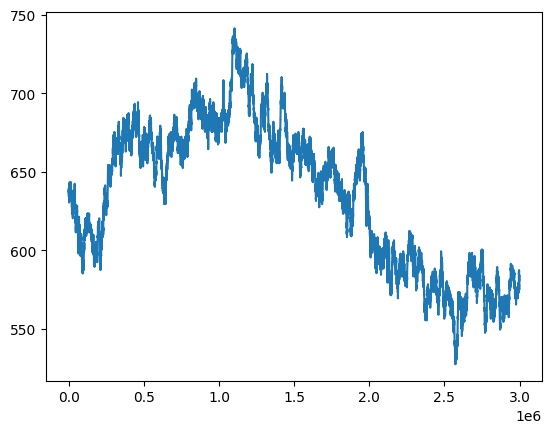

In [6]:
coupons.mid_price.plot()

In [7]:
vol = prices.mid_price.pct_change().std()*np.sqrt(len(prices))
K = 10_000

<Axes: >

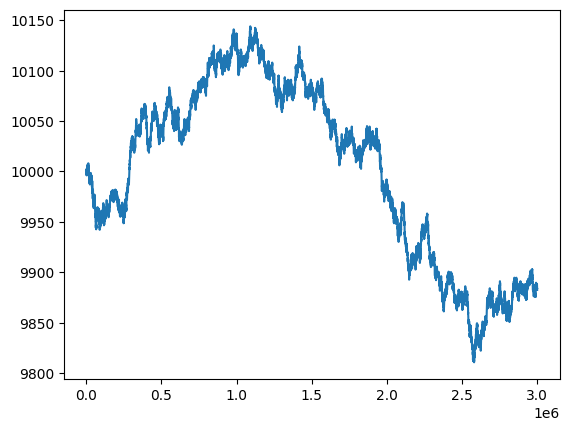

In [8]:
prices.mid_price.plot()

In [9]:
def black_scholes_call(S, K, vol, T, r):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [10]:
coupons

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,T
0,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0,0.000017
100,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0,0.000050
200,1,200,COCONUT_COUPON,637.0,42.0,NaN,NaN,NaN,NaN,638,42,NaN,NaN,NaN,NaN,637.5,0.0,0.000083
300,1,300,COCONUT_COUPON,638.0,30.0,NaN,NaN,NaN,NaN,639,30,NaN,NaN,NaN,NaN,638.5,0.0,0.000100
400,1,400,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0,0.000150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,3,999500,COCONUT_COUPON,577.0,45.0,NaN,NaN,NaN,NaN,578,45,NaN,NaN,NaN,NaN,577.5,0.0,0.999833
2999600,3,999600,COCONUT_COUPON,577.0,30.0,NaN,NaN,NaN,NaN,578,30,NaN,NaN,NaN,NaN,577.5,0.0,0.999867
2999700,3,999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0,0.999917
2999800,3,999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0,0.999933


In [11]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,T
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0,0.000000
100,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0,0.000033
200,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0,0.000067
300,1,300,COCONUT,9999.0,149.0,9998.0,51.0,NaN,NaN,10000,149,10001.0,51.0,NaN,NaN,9999.5,0.0,0.000117
400,1,400,COCONUT,9998.0,108.0,9997.0,63.0,NaN,NaN,9999,103,10000.0,63.0,NaN,NaN,9998.5,0.0,0.000133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,3,999500,COCONUT,9883.0,141.0,9882.0,66.0,NaN,NaN,9884,141,9885.0,66.0,NaN,NaN,9883.5,0.0,0.999850
2999600,3,999600,COCONUT,9884.0,119.0,9883.0,75.0,NaN,NaN,9885,119,9886.0,75.0,NaN,NaN,9884.5,0.0,0.999883
2999700,3,999700,COCONUT,9883.0,115.0,9882.0,53.0,NaN,NaN,9884,115,9885.0,53.0,NaN,NaN,9883.5,0.0,0.999900
2999800,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0,0.999950


In [12]:
coupons_theo = black_scholes_call(prices.mid_price, K, vol, 250/3 - prices["T"], 0.0)

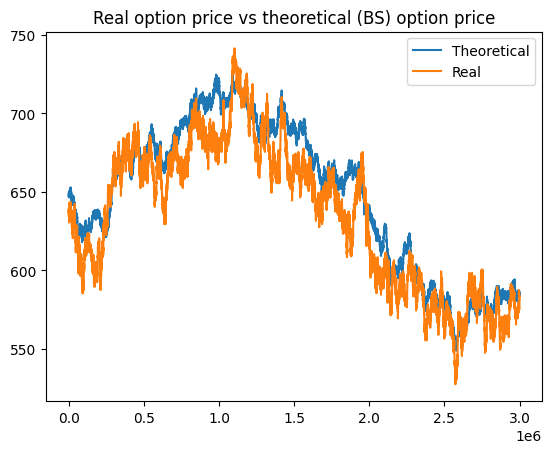

In [13]:

plt.plot(coupons_theo, label="Theoretical")
plt.plot(coupons.mid_price, label="Real")
plt.title("Real option price vs theoretical (BS) option price")
plt.legend();

In [14]:
def vol_from_black_scholes_call(S, K, T, r, call):
    def f(vol):
        return black_scholes_call(S, K, vol, T, r)[0] - call
    return f

In [15]:
from scipy.optimize import fsolve

In [16]:
vols = []
for i, row in coupons.iterrows():
    vol = fsolve(vol_from_black_scholes_call(prices.mid_price[i], K, 250/3 - prices["T"][i], 0.0, row.mid_price), 0.02)
    vols.append(vol[0])


In [25]:
coco_changes = prices['mid_price'].pct_change()
realized_vol = coco_changes.std()*100
realized_vol

0.010293960957374844

Text(0.5, 1.0, 'Market priced volatility for each option price')

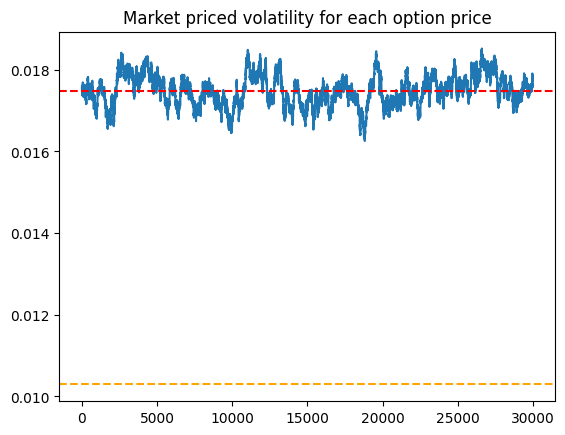

In [26]:
plt.plot(vols)
plt.axline((0, np.mean(vols)), slope=0, color="red", linestyle="--")
plt.axline((0, realized_vol), slope=0, color="orange", linestyle="--")
plt.title("Market priced volatility for each option price")

In [27]:
np.mean(vols)

0.01748330201728257